In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [70]:
data = pd.read_json("NBA_player_data.json")

In [71]:
position_mapping = {"PG": 1, "SG": 2, "SF": 3, "PF": 4, "C": 5}
positions = ["PG","SG","SF","PF","C"]
data = data.drop(data.columns[0], axis=1)

In [72]:
features = ["AST","BLK","TRB",  "STL", "TOV", "FG%","FGA","3P%","2P%"]
target = "Pos"

X = data[features]
y = data[target].map(position_mapping)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)

In [73]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [75]:
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)

print("Training Accuracy:", train_score)
print("Testing Accuracy:", test_score)

Training Accuracy: 0.6243523316062176
Testing Accuracy: 0.5581395348837209


In [76]:
loo = LeaveOneOut()
accuracies = []
X_scaled = scaler.fit_transform(X)

for train_index, test_index in loo.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Calculate average accuracy
avg_accuracy = np.mean(accuracies)
print("Average Accuracy with LOOCV:", avg_accuracy)

Average Accuracy with LOOCV: 0.6130536130536131


In [77]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Calculate average accuracy
avg_accuracy = np.mean(accuracies)
print("Average Accuracy with K-Fold CV (K=10):", avg_accuracy)

Average Accuracy with K-Fold CV (K=10): 0.5901993355481727


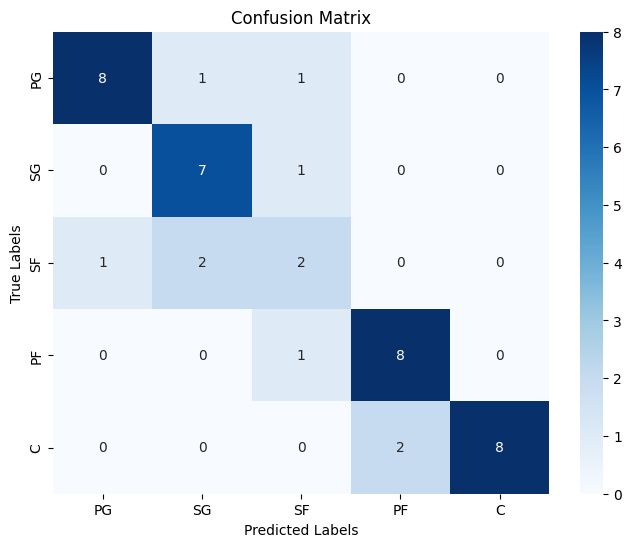

In [78]:
reverse_position_mapping = {v: k for k, v in position_mapping.items()}
positions = list(reverse_position_mapping.values())

# Generate confusion matrix with numeric labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix with seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=positions, yticklabels=positions)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()